In [1]:
#dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
#create engine to connect to sqlite file
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [6]:
#reflect an existing database into a new model
Base = automap_base()
Base.prepare (engine, reflect = True)

#reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
#save references to each table
meas = Base.classes.measurement
statn = Base.classes.station

#inspect tables for column names
inspector = inspect (engine)

# inspector.get_columns ('measurement')
#returns ('id', int, PK), ('station', str), ('date', str), ('prcp', float), ('tobs', float)

# inspector.get_columns ('station')
#returns ('id', int, PK), ('station', str), ('name', str), ('latitude', float), ('longitude', float), ('elevation', float)

In [8]:
#create session from python to database
session = Session (bind = engine)

# Exploratory Climate Analysis

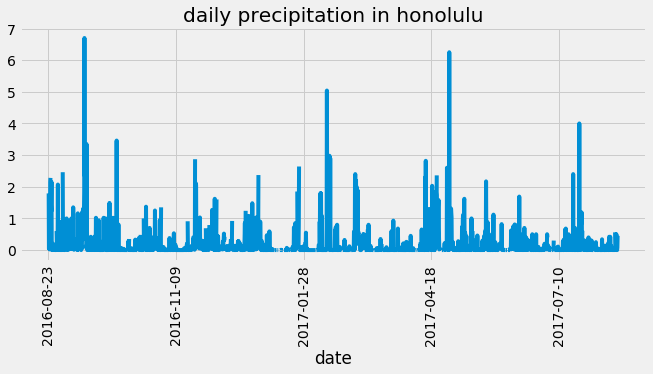

In [94]:
#retrieve last 12 months of precipitation data, plot results

#find most recent date in dataset
last_date = session.query (meas.date).order_by (meas.date.desc()).first()[0]
#print (last_date) = 2017-08-23

#convert date to datetime format, calculate one year (365 days) prior to last day, reformat
last_date_fm = dt.datetime.strptime (last_date, '%Y-%m-%d')
first_date_fm = last_date_fm - dt.timedelta (days = 365)
first_date = first_date_fm.strftime ('%Y-%m-%d')
#print (first_date) = 2016-08-23

#query data, filter dates only from last year
prcp_data = session.query (meas.date, meas.prcp).filter (meas.date >= first_date).all()

#populate dataframe, set date as index & sort
prcp_df = pd.DataFrame (prcp_data,
                        columns = ['date', 'precipitation'])

prcp_df.set_index ('date', inplace = True)
prcp_df = prcp_df.sort_index()

#plot precipitation data w/ pandas plot
prcp_df.plot (rot = 90,
              legend = False,
              title = 'daily precipitation in honolulu',
              figsize = (10,4))

plt.ylabel = 'precipitation (inches)'


In [11]:
#calculate dataframe summary statistics
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [96]:
#query station table to find # of stations
session.query(statn).count()

9

In [71]:
#list most active stations & row counts in descending order

#create dataframe from station column
statn_num_df = pd.read_sql_table ('measurement',
                                  con = engine,
                                  columns = ['station'])

#count # of rows per station
statn_counts = statn_num_df['station'].value_counts()
statn_counts

#alternative method w/o using pandas
# statn_data = session.query (meas.station, func.count (meas.station)).\
#              group_by (meas.station).\
#              order_by (func.count (meas.station).desc()).all()

# statn_data

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [74]:
#calculate lowest, highest, & avg temp of most active station
#tobs = temp @ time of observation bias

#pull most active station from previous cell
top_station = statn_counts.index[0]

# #create dataframe w/ station & temp columns
statn_temp_df = pd.read_sql_table ('measurement',
                                   con = engine,
                                   columns = ['station', 'tobs'])

#isolate data to most active station
top_statn_df = statn_temp_df.loc [statn_temp_df['station'] == top_station, :]

#use agg fxn to calculate desired measurements
top_statn_df['tobs'].agg (['min', 'max', 'mean'])

#alternative method w/o using pandas
# top_statn_temps = session.query (func.min(meas.tobs), func.max(meas.tobs), func.avg(meas.tobs)).\
#                   filter_by (station = top_station).all()
    
# top_statn_temps

min     54.000000
max     85.000000
mean    71.663781
Name: tobs, dtype: float64

Text(0.5, 0, 'temperature')

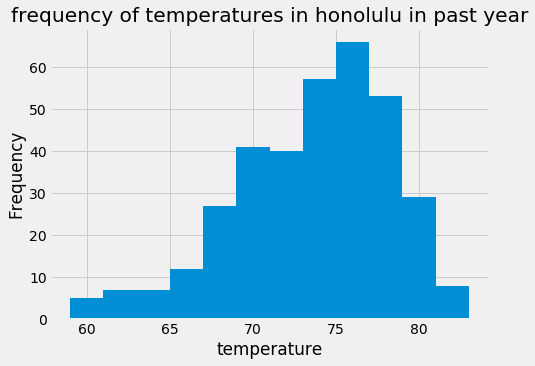

In [89]:
#query top station's last 12 months of temps, plot as histogram

#query measurement table for dates & temps
recent_temps = session.query (meas.date, meas.tobs).\
                              filter (meas.date >= first_date).\
                              filter_by (station = top_station).all()

#populate dataframe, set column names
recent_temp_df = pd.DataFrame (recent_temps,
                               columns = ['date', 'temp (F)'])

#plot histogram w/ pandas plot
recent_temp_df.plot.hist (bins = 12,
                          title = 'frequency of temperatures in honolulu in past year',
                          legend = False,
                          figsize = (7, 5))

#label x-axis
plt.xlabel ('temperature')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
